In [13]:
import sys
from pathlib import Path
python_dir = Path("/Users/keisukemurota/Documents/todo/worms/python")
sys.path.insert(0, python_dir.resolve().as_posix())
import numpy as np 
from rmsKit import utils, lattice
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

os.chdir(python_dir)

In [2]:
IMAGE_PATH = Path("visualize/image")
WORM_RESULT_PATH = python_dir / "rmsKit" / "array" / "quetta" 
MODEL_NAME = "HXYZ1D"
N = 10**6
BETA_THRES = 20
if not IMAGE_PATH.exists():
    raise FileNotFoundError("{} does not exist.".format(IMAGE_PATH.resolve()))
if not WORM_RESULT_PATH.exists():
    raise FileNotFoundError("{} does not exist.".format(WORM_RESULT_PATH.resolve()))

image_model_dir = IMAGE_PATH / MODEL_NAME
worm_result_path = WORM_RESULT_PATH / (MODEL_NAME+"_loc")

if not worm_result_path.exists():
    raise FileNotFoundError("{} does not exist.".format(worm_result_path.resolve()))


In [3]:
summary_files = utils.path.find_summary_files(worm_result_path)
df = utils.path.get_df_from_summary_files(summary_files, N)

In [5]:
print("looking for the result in {}".format(worm_result_path.resolve()))
print(worm_result_path.resolve())
df = df[df.sweeps == N]

df = df[df["T"] >= 1 / BETA_THRES]
print("temeprature simulated: {}".format(np.sort(df["T"].unique())))
print("L simulated: {}".format(np.sort(df.n_sites.unique())))

params_df = utils.param_dict_normalize(df['ham_path'].apply(utils.extract_parameters_from_path))
df_final = pd.concat([df, params_df], axis=1)
df_final = df_final.rename(columns = {"T":"temp"})

looking for the result in /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/HXYZ1D_loc
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/quetta/HXYZ1D_loc
temeprature simulated: [0.25 1.  ]
L simulated: [10 11 15]


In [6]:
df_final.temp.unique(), df_final.n_sites.unique()

(array([1.  , 0.25]), array([10, 11, 15]))

In [220]:
def filter_df(df, Jx, Jy, Jz, hx, hz):
    fil = df.Jx == Jx
    fil = fil & (df.Jy == Jy)
    fil = fil & (df.Jz == Jz)
    fil = fil & (df.hx == hx)
    fil = fil & (df.hz == hz)
    return df[fil]

In [9]:
# df = df_final[(df_final.temp == T)&(df_final.n_sites == L)]
# Jx_list = np.sort(df.Jx.unique())
# Jy_list = np.sort(df.Jy.unique())
# Jz_list = np.sort(df.Jz.unique())
# hx_list = np.sort(df.hx.unique())
# hz_list = np.sort(df.hz.unique())

# df = filter_df(df, -1.8, -1.8, 1.0, 0, 0)

In [21]:
u

array([[-7.07113191e-01, -2.77342406e-05,  2.67246957e-05,
        -7.07100370e-01],
       [-4.58757177e-01, -5.38056221e-01, -5.38117899e-01,
         4.58766261e-01],
       [ 1.52445358e-05,  7.07111092e-01, -7.07102467e-01,
        -6.97042483e-05],
       [-5.38082510e-01,  4.58791244e-01,  4.58732196e-01,
         5.38091609e-01]])

In [23]:
u = np.array([
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0],
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1,0,0,0],
    [0,0,0,1]
])

In [33]:
np.linalg.eigvalsh(h1)

array([-1.9811943 , -1.5       , -1.5       , -1.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.18889218,  0.5       ,
        0.5       ,  1.5       ,  1.5       ,  1.5       ,  1.5       ,
        1.67008649])

In [29]:
# u = np.load("rmsKit/array/torch/MG1D_loc/J1_1_J2_2_J3_2/2_mel/Adam/lr_0.0003_epoch_10000/loss_0.00039/u/0.npy")
H = np.load("rmsKit/array/torch/MG1D_loc/J1_1_J2_2_J3_2/2_mel/H/0.npy")
U = np.kron(u,u)

h1 = utils.stoquastic(-U @ H @ U.T)
h2 = -H
L = 4
print(np.linalg.eigvalsh(utils.stoquastic(-U @ H @ U.T)), np.linalg.eigvalsh(-H))
H1 = utils.sum_ham(h1, [[i, (i+1)%L] for i in range(L)], L, 4)
H2 = utils.sum_ham(h2, [[i, (i+1)%L] for i in range(L)], L, 4)

np.linalg.eigvalsh(H1)

[-1.9811943  -1.5        -1.5        -1.5        -0.5        -0.5
 -0.5        -0.5        -0.18889218  0.5         0.5         1.5
  1.5         1.5         1.5         1.67008649] [-1.5 -1.5 -1.5 -1.5 -1.5 -0.5 -0.5 -0.5  0.5  0.5  0.5  1.5  1.5  1.5
  1.5  1.5]


array([-6.60238969e+00, -6.01659368e+00, -6.01659368e+00, -6.00000000e+00,
       -5.08946919e+00, -5.07193033e+00, -5.07193033e+00, -4.80428572e+00,
       -4.80428572e+00, -4.75434939e+00, -4.75434939e+00, -4.75434939e+00,
       -4.75434939e+00, -4.41594368e+00, -4.41594368e+00, -4.35552032e+00,
       -4.30187330e+00, -4.30187330e+00, -4.27984726e+00, -4.27984726e+00,
       -4.00000000e+00, -4.00000000e+00, -4.00000000e+00, -4.00000000e+00,
       -4.00000000e+00, -3.78446646e+00, -3.69815412e+00, -3.69815412e+00,
       -3.53923707e+00, -3.53923707e+00, -3.53923707e+00, -3.53923707e+00,
       -3.32803129e+00, -3.32803129e+00, -3.27117635e+00, -3.13790756e+00,
       -3.13790756e+00, -3.10225986e+00, -3.10225986e+00, -3.10225986e+00,
       -3.10225986e+00, -3.00000000e+00, -2.85514139e+00, -2.85514139e+00,
       -2.70817290e+00, -2.70817290e+00, -2.65344988e+00, -2.56574317e+00,
       -2.56574317e+00, -2.53407020e+00, -2.47496926e+00, -2.47496926e+00,
       -2.43903034e+00, -

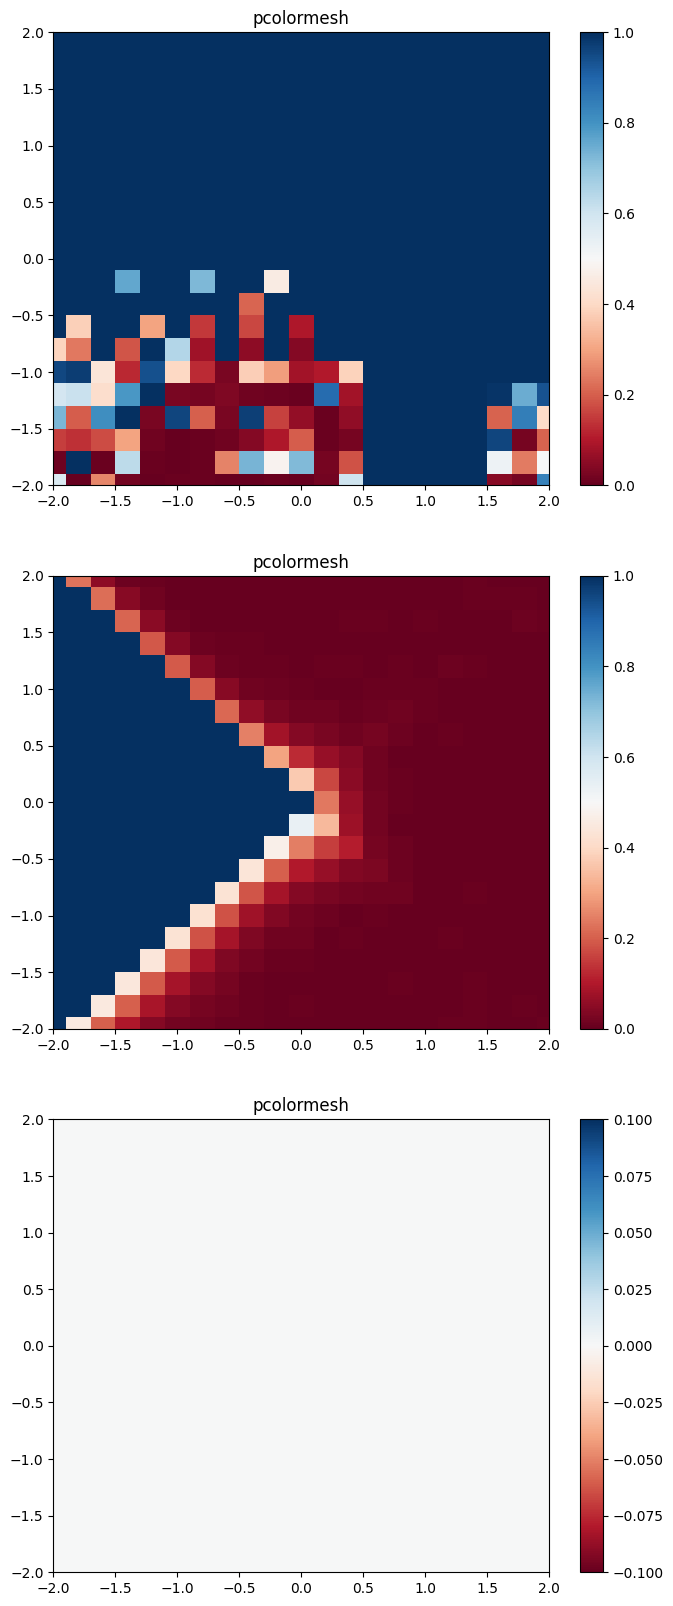

In [12]:
h = 0.5
T = 0.25
L = 10

df = df_final[(df_final.temp == T)&(df_final.n_sites == L)]

Jx_list = np.sort(df.Jx.unique())
Jy_list = np.sort(df.Jy.unique())
Jz_list = np.sort(df.Jz.unique())
hx_list = np.sort(df.hx.unique())
hz_list = np.sort(df.hz.unique())

z = []
z2 = []
z3 = []
df = df[df.hx == h]
x, y = np.meshgrid(Jx_list, Jy_list)
for Jx, Jy in zip(x.reshape(-1), y.reshape(-1)):
    df_plot = df[df.hx == h]
    df_plot = df_plot[(df_plot.Jx==Jx) & (df_plot.Jy==Jy)]
    df_u = df_plot[~df_plot.loss.isna()]
    df_h = df_plot[df_plot.loss.isna()]
#     au = df_u["as"].min()
    ah = df_h["as"].min()
    idx = np.argmin(df_u.loss.values)
    loss = df_u.loss.values[idx]
    init_loss = df_u.init_loss.values[idx]
    au = df_u["as"].values[idx]
    z3.append(loss)
    z.append(au)
    z2.append(ah)
Z = np.array(z).reshape(x.shape)
Z2 = np.array(z2).reshape(x.shape)
Z3 = np.array(z3).reshape(x.shape)

fig, ax = plt.subplots(3, 1,figsize=(8,20))

c = ax[0].pcolormesh(x, y, Z, cmap='RdBu', vmin=0, vmax=1)
ax[0].set_title('pcolormesh')
ax[0].axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax[0])

c = ax[1].pcolormesh(x, y, Z2, cmap='RdBu', vmin=0, vmax=1)
ax[1].set_title('pcolormesh')
ax[1].axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax[1])

c = ax[2].pcolormesh(x, y, Z3, cmap='RdBu', vmin=0, vmax=np.max(Z3))
ax[2].set_title('pcolormesh')
ax[2].axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax[2])


plt.show()

In [285]:
df_final.loss.unique()

array([ 0., nan])

In [224]:
df1 = df[df.Jx == df.Jy]
df2 = df1[df1["as"] != 1]